#                                   Suicide Data - Initial Processing


##### This data has been taken from Kaggle.com. It is a data set with information regarding suicides across countries, age groups, and sexes since 1985. I chose this data because the data set is fairly large, clean and well organized (there are no missing values). I felt that it would be a good set to work because I'd be able to focus on the data visualization aspect and not spend too much time on the Quality Assurance aspect.

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [4]:
%matplotlib inline

import matplotlib as mpl

In [5]:
mpl.rcParams["figure.figsize"] = (6, 6)

##### Dropping variables I won't be using

In [6]:
suicides = pd.read_csv("data/master.csv")

In [7]:
suicides = suicides.drop(columns="HDI for year")

In [8]:
suicides = suicides.drop(columns="country-year")

In [16]:
suicides = suicides.drop([suicides.columns[7]], axis ='columns')

In [17]:
suicides.head(45)

,country,year,sex,age_group,suicides,population,suicide_rate,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,796,Generation X


###### Getting general shape of some correlations

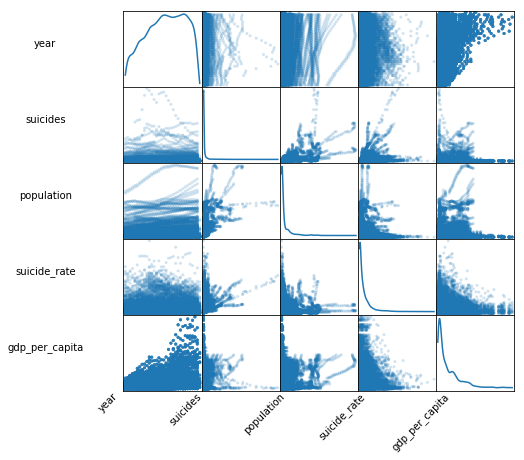

In [18]:
sm = scatter_matrix(suicides, alpha=0.2, figsize=(7, 7), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

In [19]:
suicides = suicides.rename(columns={
    "suicides_no":"suicides",
    "age":"age_group",
    "suicides/100k pop":"suicide_rate", #suicides/100kpop
    "gdp_per_capita ($)":"gdp_per_capita",
})

In [20]:
suicides.dtypes

country            object
year                int64
sex                object
age_group          object
suicides            int64
population          int64
suicide_rate      float64
gdp_per_capita      int64
generation         object
dtype: object

In [21]:
suicides.head()

,country,year,sex,age_group,suicides,population,suicide_rate,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


### Data Dictionary

* country (object). Country where events took place
* year (int). 
* sex (object). Sex of suicide victim
* age (object). Age range of suicide victim
* suicides (int). Number of suicides 
* population (int). Country population that year
* suicide rate (float). suicides per 100k population
* gdp per capita (int). Per person GDP for that country that year in US dollars
* generation (object). Which generation the age group is representing

In [23]:
suicides.to_csv("data/suicides.1.initial_process.csv", index=False)